# A feature matching example using the MFD algorithm
Cross-spectral/multispectral feature descriptor algorithms.  
Notebook used for testing and experiments.  
Author: Cristiano Nunes.  
E-mail: cfgnunes@gmail.com

---

In [1]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from src.feature_matching import FeatureMatching
import src.utils_plot as up
from src.descriptor_ehd import EHD
from src.descriptor_eoh import EOH
from src.descriptor_mfd import MFD

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'jpeg'

---
## Define the detector and descriptor algorithms

In [3]:
result_precision = pd.DataFrame()
result_matches = pd.DataFrame()

def add_descriptor_algoritm(desc, name):
    descriptor_algorithms.append((desc, name))
    result_precision[name] = 0
    result_matches[name] = 0

# Define the detector algorithm
detector_algorithm = cv2.FastFeatureDetector_create(
    threshold=40,
    nonmaxSuppression=True)

descriptor_algorithms = []

desc = cv2.xfeatures2d.SIFT_create(
    nfeatures=500,
    nOctaveLayers=3,
    contrastThreshold=0.04,
    edgeThreshold=10.0,
    sigma=1.6)
add_descriptor_algoritm(desc, 'SIFT')

desc = EHD()
add_descriptor_algoritm(desc, 'EHD')

desc = EOH()
add_descriptor_algoritm(desc, 'EOH')

desc = MFD()
add_descriptor_algoritm(desc, 'MFD')

## Sample of results

In [4]:
def run_batch(image_a_filename, image_b_filename):
    # Run all algoritmhs
    result_precision_it = []
    result_matches_it = []
    for descriptor_algorithm, descriptor_name in descriptor_algorithms:
        fm = FeatureMatching(detector_algorithm, descriptor_algorithm)
        image_matches, matches, precision = fm.match_features(image_a_filename, image_b_filename)
        title = "Algorithm %s (Best matches: %i, Precision: %.2f)" % \
            (descriptor_name, matches, precision)
        
        # Resize image to produce a small notebook file
        dim = (int(image_matches.shape[1] * 0.4), int(image_matches.shape[0] * 0.4))
        image_matches2 = cv2.resize(image_matches, dim, interpolation = cv2.INTER_AREA)

        up.plot_image_list([image_matches2], [title], scale_factor=12)
        
        result_precision_it.append(precision)
        result_matches_it.append(matches)
    
    result_precision.loc[len(result_precision) + 1] = result_precision_it
    result_matches.loc[len(result_matches) + 1] = result_matches_it

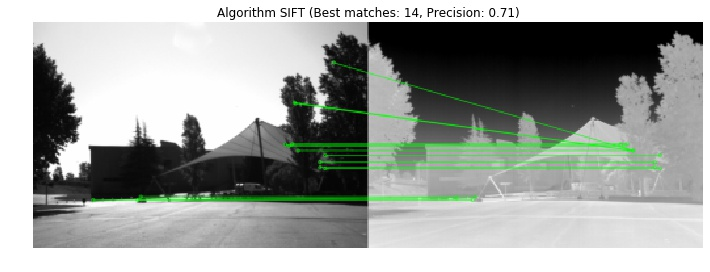

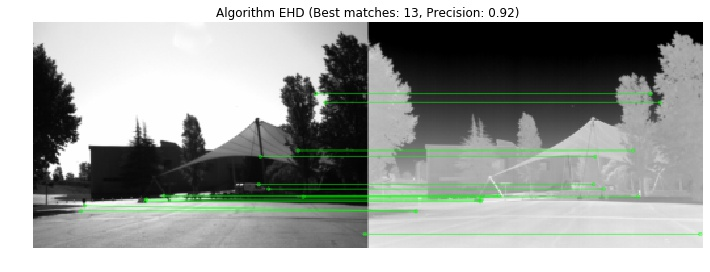

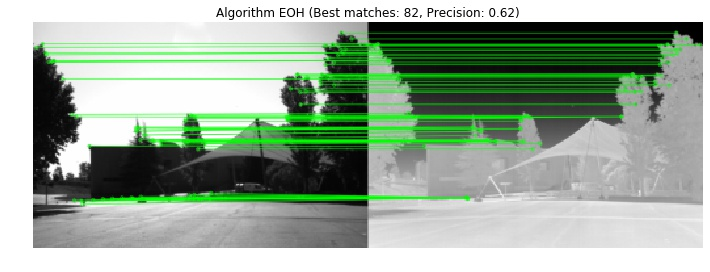

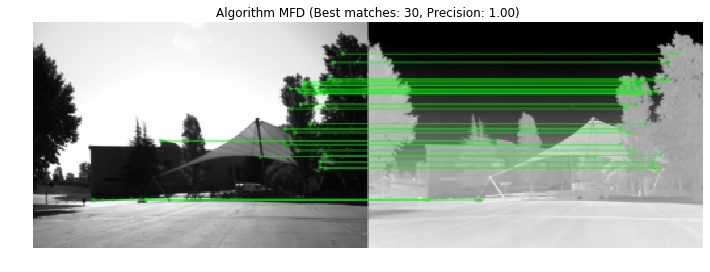

In [5]:
run_batch("images-sample/rgb37.bmp", "images-sample/lwir37.png")

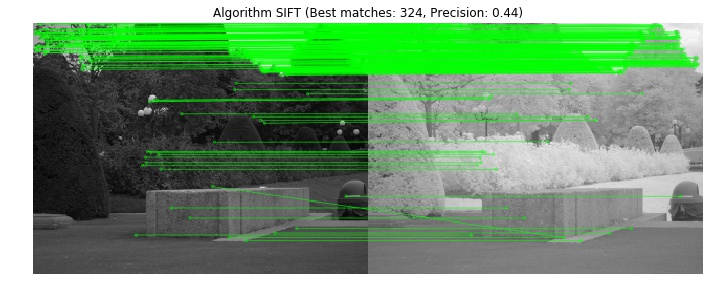

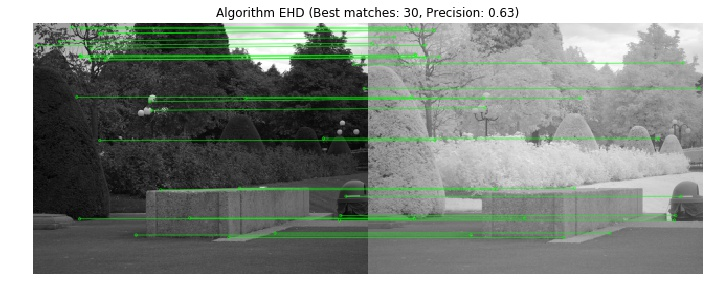

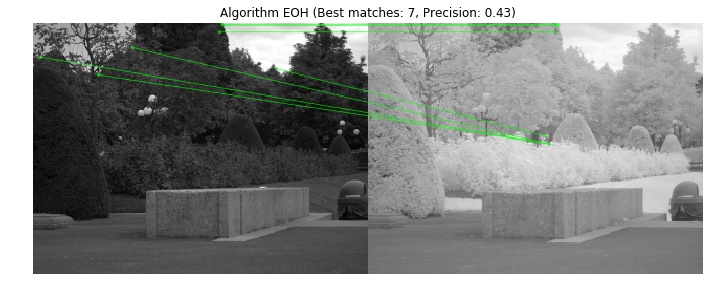

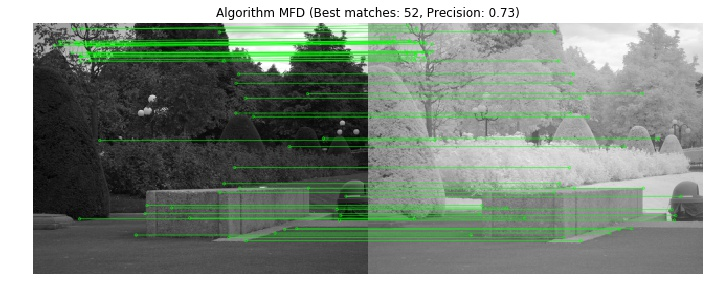

In [6]:
run_batch("images-sample/img1.png", "images-sample/img2.png")

In [7]:
result_precision.describe()

,SIFT,EHD,EOH,MFD
count,2.000000,2.000000,2.000000,2.000000
mean,0.574735,0.778205,0.525261,0.865385
std,0.197354,0.204880,0.136740,0.190375
min,0.435185,0.633333,0.428571,0.730769
25%,0.504960,0.705769,0.476916,0.798077
50%,0.574735,0.778205,0.525261,0.865385
75%,0.644511,0.850641,0.573606,0.932692
max,0.714286,0.923077,0.621951,1.000000


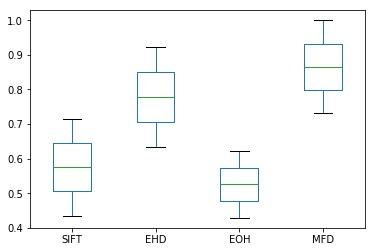

In [8]:
plot = result_precision.boxplot(grid=False)